<a href="https://colab.research.google.com/github/fateehhh/PCVK_Ganjil_2025/blob/main/Week1_pcvk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
from skimage import transform
from PIL import Image
import matplotlib.pylab as plt

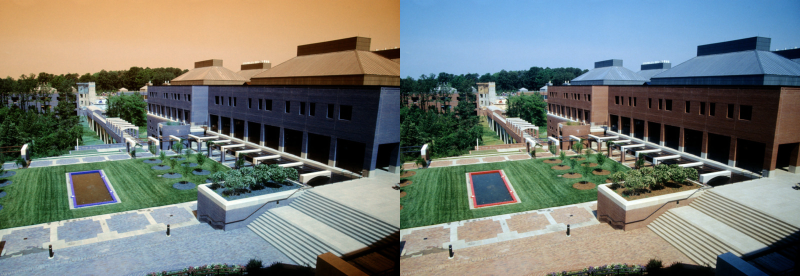

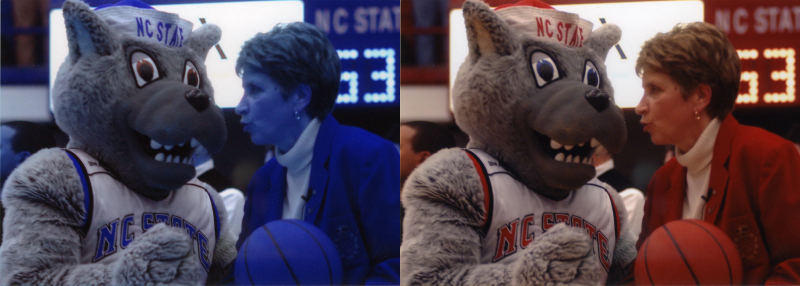

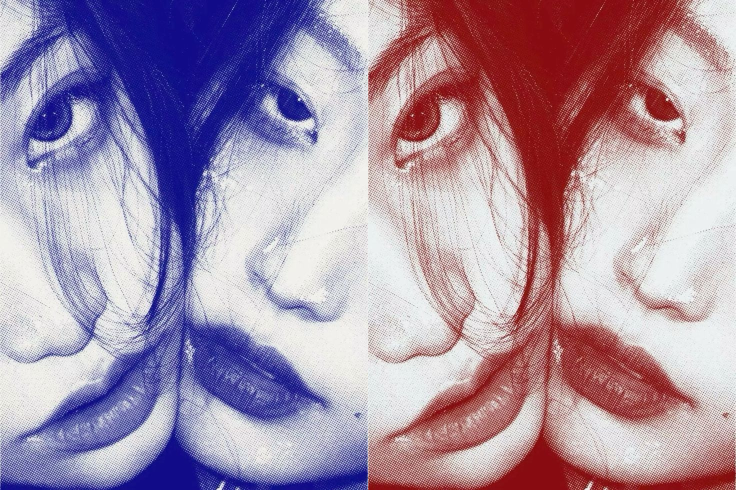

In [7]:
# Membuat list untuk menyimpan url dari beberapa image
urls = ["https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg",
        "https://iiif.lib.ncsu.edu/iiif/0016007/full/800,/0/default.jpg",
        "https://i.pinimg.com/736x/51/07/b1/5107b1631c34927fd4fd3632d53446fc.jpg"]

# baca dan tampilkan image
# loop pada tiap url image, beberapa image dapat disimpan pada list
for url in urls:
    image = io.imread(url)                                 #read image
    image = cv.resize(image, (0,0), fx=0.5, fy=0.5)         #resize image to half size
    image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)          #convert color to RGB
    final_frame = cv.hconcat((image, image_2))              #concatenate image
    cv2_imshow(final_frame)                                 #show image
    print('\n')

In [8]:
tinggi = image_2.shape[0]
lebar = image_2.shape[1]
print("resolusi image: tinggi x lebar = ", tinggi, " x ", lebar)

resolusi image: tinggi x lebar =  490  x  368


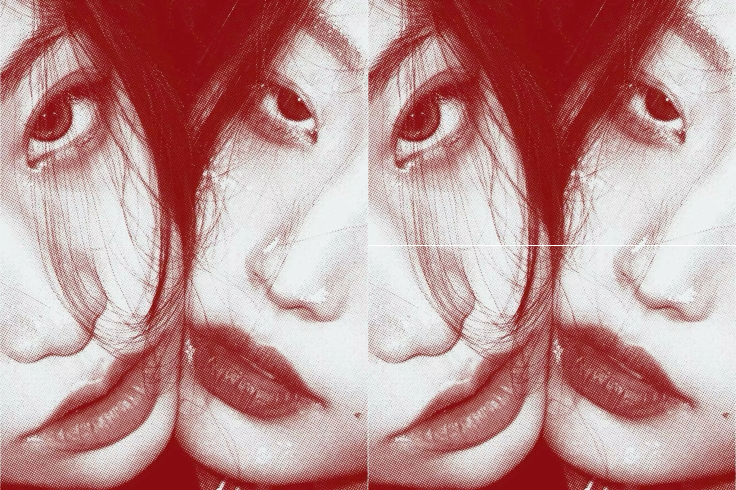

In [10]:
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

#membuat garis horizontal ditengah image
for y in range (lebar):
    image_3[int((tinggi)/2),y] = [255,255,255]

final_frame = cv.hconcat((image_2, image_3))
cv2_imshow(final_frame)

# **Pertanyaan**

---



### **1. Jelaskan, mengapa pada modul praktikum ini eksekusi kode Python dilakukan menggunakan Google Colab?**

**Jawab:** karena google colab menyediakan banyak library yang mendukung pemrograman python. Google colab juga menggunakan cloud dan gratis, sehingga memudahkan pengerjaan maupun kolaborasi

### **2. Jelaskan mengenai kegunaan setiap library pada praktikum langkah ke delapan?Apakah semua library tersebut harus digunakan dalam praktikum sesi ini?**

*   numpy: Untuk operasi numerik dan array.
*   pandas: Untuk analisis dan manipulasi data tabel.
*   cv2: Library utama untuk pengolahan gambar dan visi komputer (OpenCV).
*   google.colab.patches.cv2_imshow: Menampilkan gambar OpenCV di Google Colab.
*   skimage.io: Membaca dan menulis file gambar (bagian dari scikit-image).
*   skimage.transform: Melakukan transformasi pada gambar (bagian dari scikit-image).
*   PIL (Pillow): Library lain untuk pengolahan gambar.
*   matplotlib.pylab: Membuat plot dan visualisasi data.

Library lain seperti pandas, skimage.transform, PIL, dan matplotlib.pylab mungkin tidak digunakan di setiap langkah, tetapi mereka menyediakan fungsionalitas tambahan yang bisa berguna tergantung pada tujuan spesifik dari setiap bagian praktikum.


### **3. Pada uji coba langkah ke-9 terdapat potongan kode program sebagai berikut :**

> `image = cv.resize(image, (0,0), fx=0.5, fy=0.5)`
### **Apa kegunaan kode program tersebut?dan apa pengaruhnya jika tidak dilakukan?**



Jawab: Mengecilkan ukuran citra (resize menjadi ½ dari aslinya) → agar lebih ringan diproses dan ditampilkan.

Konversi BGR → RGB → karena OpenCV default membaca citra dalam format BGR, sedangkan Matplotlib menampilkannya dalam RGB.
Jika tidak dilakukan, gambar bisa terlihat terbalik warnanya (merah jadi biru, dst).

### **4. Perhatikan potongan kode progam berikut :**

```
# #membuat garis horizontal ditengah image
for y in range (lebar):
    image_3[int((tinggi)/2),y] = [255,255,255]
```
**Apakah kegunaan kode [255,255,255] ? Jelaskan!**


Jawab: [255,255,255] merepresentasikan warna putih dalam format RGB (karena R=255, G=255, B=255). Nilai 255 adalah intensitas maksimum dari tiap channel warna (8-bit). Jika digunakan untuk mengganti pixel, maka pixel tersebut akan menjadi putih.

### **5. Jelaskan keterkaitan antara pixel dan juga resolusi gambar yang tinggi ataupun rendah!**

Jawab: **Resolusi adalah** jumlah pixel dalam citra (misalnya 1920x1080 = 2 juta pixel). Semakin tinggi resolusi → semakin banyak pixel → detail gambar semakin tajam. Semakin rendah resolusi → jumlah pixel lebih sedikit → gambar terlihat pecah atau blur.

# **Tugas**

### **1. Lakukan langkah-langkah praktikum seperti diatas**

In [46]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
from skimage import transform
from PIL import Image
import matplotlib.pylab as plt

# Baca citra dari URL
url = "https://i.pinimg.com/1200x/55/25/64/552564cc33b15eb6424f7849b190b673.jpg"
image = io.imread(url)
image = cv.resize(image, (0,0), fx=0.5, fy=0.5)
img = np.array(image)
h, w, _ = img.shape

# Salin gambar agar tidak menimpa
output = img.copy()


### **2. Membuat garis vertikal dan garis menyilang diagonal pada image keluaran**

Asli vs Vertikal


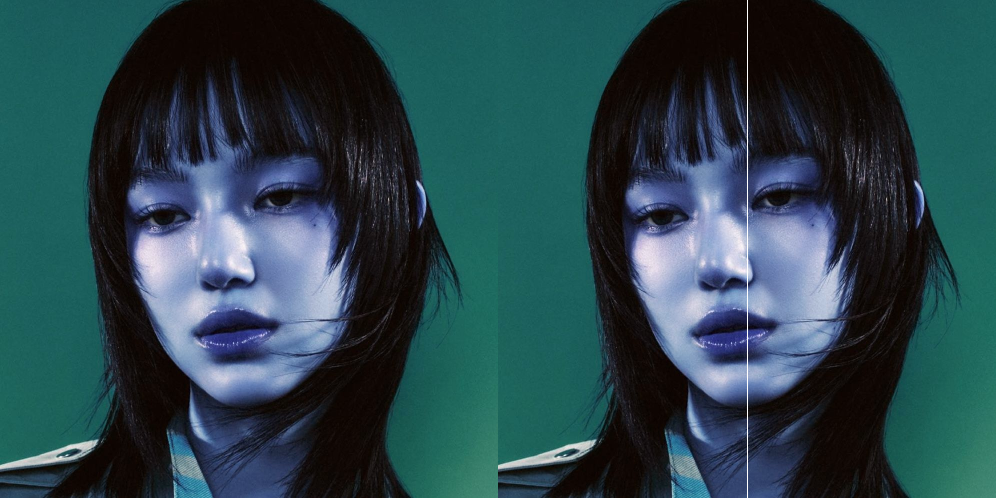

Asli vs Diagonal (dua arah)


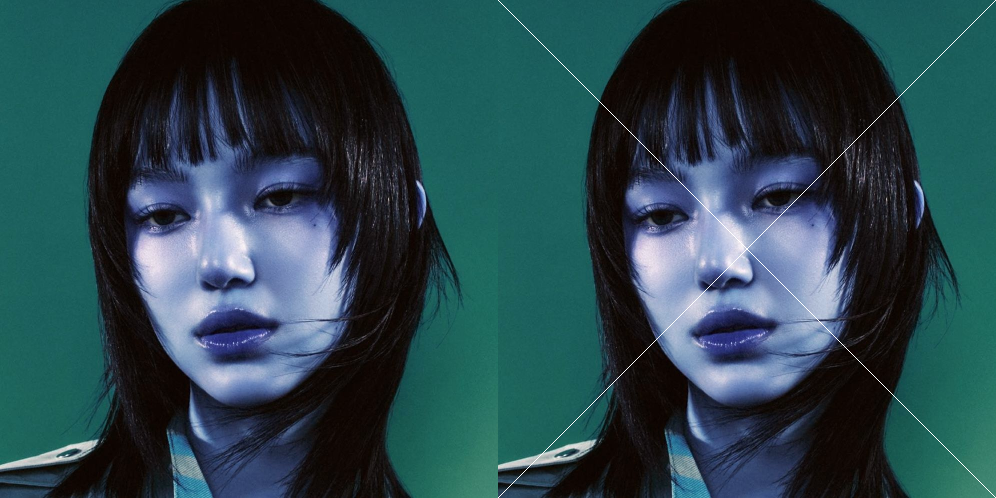

In [47]:
# === 1. Garis vertikal putih di tengah ===
vertikal = img.copy()
vertikal[:, w//2] = [255,255,255]

# === 2. Garis diagonal putih ↘ dan ↙ ===
diagonal = img.copy()
# Diagonal dari kiri atas ke kanan bawah
for i in range(min(h, w)):
    diagonal[i, i] = [255,255,255]
# Diagonal dari kanan atas ke kiri bawah
for i in range(min(h, w)):
     diagonal[i, w-1-i] = [255,255,255]


final_vertikal = cv.hconcat((img, vertikal))
print("Asli vs Vertikal")
cv2_imshow(final_vertikal)

final_diagonal = cv.hconcat((img, diagonal))
print("Asli vs Diagonal (dua arah)")
cv2_imshow(final_diagonal)

### **3. Buat garis horisontal berwarna putih dibagian tengah gambar dengan panjang tertentu**

Asli vs Horizontal


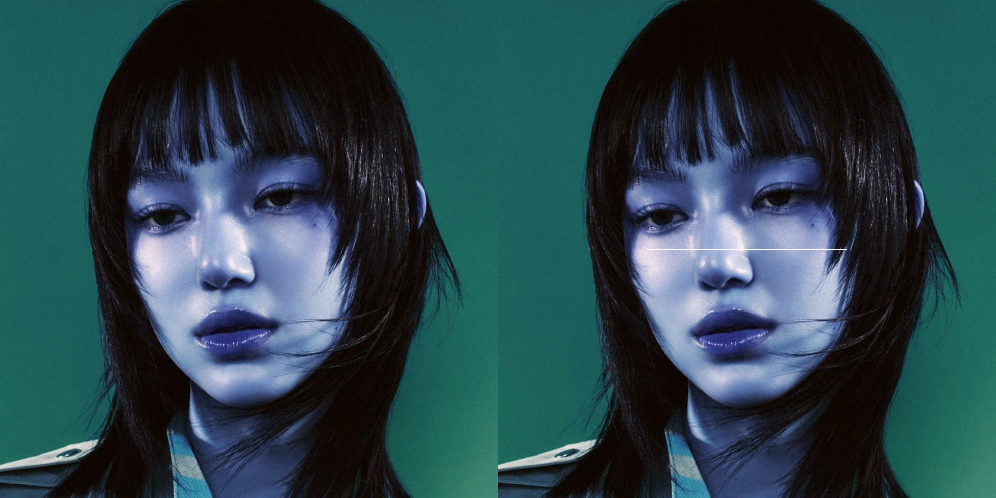

In [48]:
# === 3. Garis horizontal putih di tengah dengan panjang tertentu (misal 200 pixel) ===
horizontal = img.copy()
start_x = (w-200)//2
end_x = start_x + 200
horizontal[h//2, start_x:end_x] = [255,255,255]

print("Asli vs Horizontal")
image = cv.hconcat((img, horizontal))
cv2_imshow(image)

### **4. Buat kotak menggunakan kumpulan pixel warna putih di sembarang tempat dalam gambar**

Asli vs Kotak putih


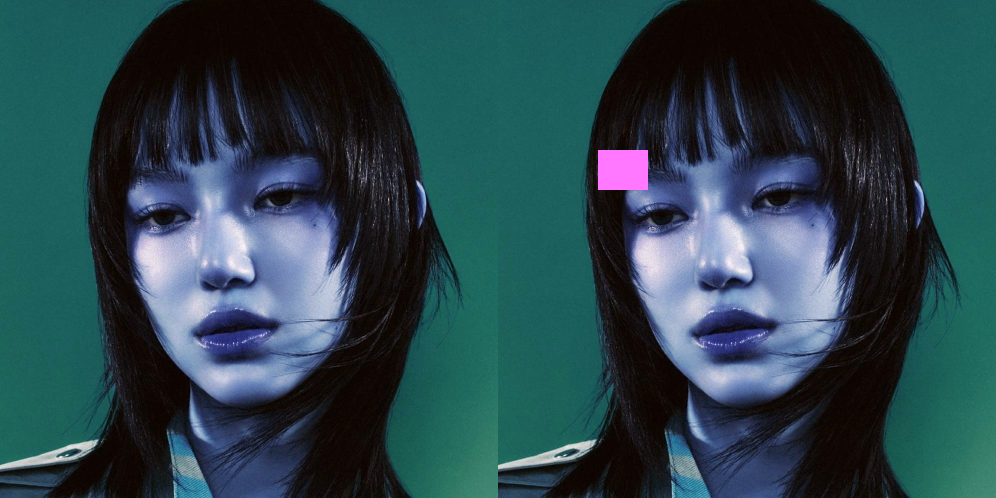

In [58]:
# === 4. Kotak putih ukuran 50x50 di posisi (100,100) ===
kotak = img.copy()
kotak[150:190, 100:150] = [255,120,255]

print("Asli vs Kotak putih")
image = cv.hconcat((img, kotak))
cv2_imshow(image)